In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import tqdm

In [2]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['font.size'] = 10
rcParams['figure.autolayout'] = True
rcParams['font.family'] = 'sans-serif'
rcParams['figure.figsize'] = (4, 4)
rcParams['axes.xmargin'] = 0.02
rcParams['axes.ymargin'] = 0.02
rcParams['savefig.dpi'] = 600

In [4]:
from photonics.sim import *
from photonics.demix import *

Connecting dbadmin@dimitri-proj0.cda95qzjbnvs.us-east-1.rds.amazonaws.com:3306


In [10]:
SpikeSNR.populate()
Cosine.populate()

In [ ]:
s12 = (SpikeSNR & 'design=12' & 'sample=1').fetch1('snr')

In [ ]:
s11 = (SpikeSNR & 'design=11' & 'sample=1').fetch1('snr')

In [ ]:
(s12-s11).mean()

In [ ]:
plt.scatter(np.log10(s11), np.log10(s12), s=1)

In [ ]:
samples = [2, 4, 6, 8]
samples = [6, 8]
designs = [1, 4, 11, 12]

for design, sample in tqdm.tqdm([(design, sample) for design in designs for sample in samples]):
    fig, ax = plt.subplots(1, 1, figsize=(2.6, 1.8), sharex=True, sharey=True)
    key = dict(design=design, sample=sample)
    snrs, cosines, density = (SpikeSNR * Cosine * Sample & key).fetch1(
        'snr', 'cosines', 'density')

    selection, xyz = (Demix*Tissue & key).fetch1('selection', 'cell_xyz')
    xyz = xyz[selection]
    dxyz = np.stack((Geometry.Detector & key).fetch('d_center_x', 'd_center_y', 'd_center_z')).T
    ix = (np.logical_and(xyz > dxyz.min(axis=0), xyz < dxyz.max(axis=0))).any(axis=1)
    cos = cosines[ix]
    snr = snrs[ix]
    lcos = np.log10(np.maximum(0.01, cos))
    lsnr = np.log10(np.maximum(0.01, snr))
    xy = np.vstack([lsnr - lcos, lcos])
    z = gaussian_kde(xy)(xy)
    h = ax.scatter(snr/np.maximum(cos, 1e-6), cos, c=z, s=2, marker='o', lw=0, cmap='inferno', alpha=0.3)
    h.set_clim([0, 3.0])
    ax.plot([1, 10000], [3, 3/10000], color=[0.2, 0.6, 1.0], linewidth=2, alpha=0.6, ls='-')
    ax.plot([1, 10000], [1, 1/10000], color=[0.2, 0.6, 1.0], linewidth=1, alpha=0.6, ls='--')
    ax.plot([1, 10000], [10, 10/10000], color=[0.2, 0.6, 1.0], linewidth=1, alpha=0.6, ls='--')
    ax.set_xticks(10. ** np.r_[-5:1])
    ax.set_yticks(10. ** np.r_[-5:5])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_aspect('equal')
    ax.yaxis.set_ticks_position('right')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_frame_on(False)
    ax.grid(True, linewidth=0.5, linestyle=':')
    ax.set_xlim([3.0, 2.e3])
    ax.set_ylim([0.01, 1.02])
    # ax.set_title('{density}/mm$^2$'.format(density=density))
    # plt.setp(ax.get_yticklabels(), visible=False)
    fig.savefig(f'figures/sig_{design:03d}_{density:06d}.png')

In [ ]:
!open figures

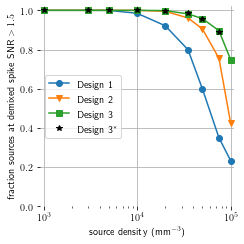

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
for design, marker in zip((1, 4, 11, 12), ('o-', 'v-', 's-', 'k*')):
    density, snr = (SpikeSNR * Sample & {'design': design}).fetch('density', 'snr')
    ax.plot(density, [(s > 1.5).mean() for s in snr], marker, ms=6)

ax.set_ylim([0, 1.02])
ax.legend(('Design 1', 'Design 2', 'Design 3' ,'Design 3$^*$'), loc='center left')
ax.set_xscale('log')
ax.set_frame_on(False)
ax.grid(True)
ax.set_xlabel('source density (mm$^{-3}$)')
ax.set_ylabel('fraction sources at demixed spike $\mathsf{SNR} > 1.5$')
fig.savefig('figures/comparison.pdf')
    

In [24]:
print('Design, Density, Percent')
for design, density, snr in zip(*((SpikeSNR * Sample) & 'design in (1, 4, 11, 12)').fetch('design', 'density', 'snr')):
    print(f'{design}, {density}, {100*(snr>1.5).mean():3.2f}')

Design, Density, Percent
1, 1000, 100.00
1, 3000, 100.00
1, 5000, 99.95
1, 10000, 98.50
1, 20000, 92.13
1, 35000, 79.92
1, 50000, 59.85
1, 75000, 35.00
1, 100000, 23.33
4, 1000, 100.00
4, 3000, 100.00
4, 5000, 100.00
4, 10000, 99.97
4, 20000, 99.49
4, 35000, 96.12
4, 50000, 90.46
4, 75000, 75.55
4, 100000, 42.58
11, 1000, 100.00
11, 3000, 100.00
11, 5000, 100.00
11, 10000, 100.00
11, 20000, 99.85
11, 35000, 98.19
11, 50000, 95.76
11, 75000, 89.60
11, 100000, 74.87
12, 1000, 100.00
12, 3000, 100.00
12, 5000, 100.00
12, 10000, 100.00
12, 20000, 99.83
12, 35000, 98.40
12, 50000, 95.77
12, 75000, 89.10
12, 100000, 71.27


In [ ]:
30 * 

In [8]:
Sample()

sample,density cells per cubic mm
0,1000
1,3000
2,5000
3,10000
4,20000
5,35000
6,50000
7,75000
8,100000


In [ ]:
plt.plot((20000, 35000), (440, 1015))
440/20

In [ ]:
1015/35

In [ ]:
50*35

In [ ]:
dj.jobs

In [ ]:
schema.jobs

In [ ]:
(schema.jobs & 'status="error"').delete()

In [ ]:
schema.jobs.delete()

In [ ]:
dj.kill()